<a href="https://colab.research.google.com/github/Shriyashzzz/steam-game-pricing-analysis/blob/main/Game___Price_Analysis_on_Steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pltpatch


## Before You Scroll, Quick read this

**What are we looking for in this NoteBook?**
 1. I am going over an database that has all the games that were released on steam between 2021-2025.
 >  *Although, I will primarily going to be looking at the Multi-Player Games. I will eventually explore single player price trends too. Right now, I want to see if there is any trend in Pricing of Multiplayer Games that are released on steam.*

 2. What I really want to take away from this analysis is to see if there is any way "statistically proven way" to buy games that will cost me less. I'd like to have fun with my friends in way that does not break my wallet. so again why do this?
 > *I am broke and have some time rn so why not hehe*

3. Also please read the titles carefully, most of these pricing analysis are split into two. i.e
>**Genral** (paid+free games) & **Paid** (games that is going to cost you money to buy).


4. This database does **not** contain the pre-existing game before 2021, only the **new releases**. The price reflected is the release price. It does not reflect the prices that are subject to changes, such as sales, discounts etc.
>*With that out of the way. Let's Dive In!*

In [ ]:
pd.set_option('display.max_rows', 800)
df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/CSV_Files/a_steam_data_2021_2025.csv")
df.dropna(subset= [ "categories","price"])

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues
...,...,...,...,...,...,...,...,...,...,...
65516,3097010,X Simulator Drone,2024,"Jul 31, 2024",Casual;Indie;Simulation,Single-player;Family Sharing,14.99,0,Inonia Games,Inonia Games
65517,3304930,Retro Dungeon Slayer,2025,"Mar 3, 2025",Action;Indie;Early Access,Single-player;Family Sharing,4.99,0,Hard Shark Games,Hard Shark Games
65518,1461580,Molecule Builder,2021,"Feb 4, 2021",Simulation;Education,Single-player;Tracked Controller Support;VR On...,14.99,0,Xennial Digital,Xennial Digital
65519,1379120,MechNest,2024,"Apr 13, 2024",Action;Indie,Single-player;Partial Controller Support;Famil...,15.99,0,PoisonGames,PoisonGames


##How has the price of multiplayer games increased in the years?


In [ ]:
# Clean the category column/make it easy to work with

def get_category(x):
  stripped_str = ""
  for i in range(len(x)):
      if x[i] == ";":
        stripped_str = x[:i]
        return stripped_str

df['categories'] = df['categories'].astype(str).apply(get_category).where(df['categories'].notnull())

In [ ]:
df.head(15)

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player,3.99,0,Wagner Rodrigues,Wagner Rodrigues
5,1724980,The Lone Blade,2023,"May 23, 2023",Action;Adventure;Indie,Single-player,1.99,0,Opia Games,Opia Games;Plug In Digital
6,3822820,Knight Crawler,2025,"Jul 16, 2025",Action;Indie;Free To Play,Single-player,0.00,0,Taylor Conolley,Taylor Conolley
7,3863460,No Sweet Looks,2025,"Aug 28, 2025",Action;Indie,Single-player,2.99,0,halvardo13,halvardo13
8,3216610,League Of Tacticians: Path of Tarkan,2025,"May 21, 2025",Adventure;RPG;Strategy,Single-player,3.99,0,Oba Games,Oba Games
9,3057250,Pennylooter,2025,"Sep 8, 2025",Action;Indie,Single-player,6.99,0,Josh Sellers,Josh Sellers


In [ ]:
def get_month(release_date):
  stripped_str = ""
  for i in range(len(release_date)):
    if release_date[i] == " ":
      stripped_str = release_date[:i]
      return stripped_str

def keep_only_date(release_date):
  stripped_str = ""
  if release_date[:3] == "Q4":
    return "Q4"
  else:
    if len(release_date) == 12:
      return release_date[4:6]
    else:
      return release_date[4:5]





In [ ]:
df["release_month"] = df["release_date"].astype(str).apply(get_month).where(df["release_date"].notnull())
df["release_date"] = df["release_date"].astype(str).apply(keep_only_date).where(df["release_date"].notnull())


#Categories of Game uploaded to Steam


In [ ]:

df.groupby("categories")["appid"].count()

,appid
categories,
Camera Comfort,1
Captions available,1
Custom Volume Controls,1
Full controller support,1
Keyboard Only Option,1
Multi-player,2561
PvP,1
Single-player,59744
Steam Achievements,7


In [ ]:
# Dataframe for just multiplayer games
df_multiplayer = df[df["categories"] == "Multi-player"]
df_multiplayer = df_multiplayer.drop(columns = ["categories"])
df_multiplayer.head(20)

,appid,name,release_year,release_date,genres,price,recommendations,developer,publisher,release_month
21,1314230,Battle Dawn 2: Terra Reborn,2022,17,Free To Play;Massively Multiplayer;Strategy,0.00,0,Zero Games Studios,Gato Games,Oct
25,1981780,FAMILY BATTLE タッグアリーナ,2022,5,Action;Casual;Indie;Early Access,9.99,0,nekogameteacher,Kodansha,Aug
26,3822740,Tactical2,2025,30,Strategy;Free To Play;Early Access,0.00,0,D/Vision Lab s.r.l.,D/Vision Lab s.r.l.,Aug
32,2446340,Garestia,2023,19,Free To Play,0.00,0,yugamesplay,yugamesplay,Jun
47,3015640,Last Heist,2025,2,Action;Free To Play,0.00,0,D Games,D Games,Aug
64,1981740,Palmas,2022,18,Action;Adventure;Casual;Indie;Massively Multip...,4.99,0,palmasandpazu,palmasandpazu,May
107,3056870,Solar Sweets,2024,6,Indie;Simulation;Free To Play,0.00,0,PIE Dev Studios,PIE Dev Studios,Aug
122,1906220,Мафия Онлайн,2022,13,Action;Indie;Massively Multiplayer;Free To Play,0.00,0,Mafia Games,Mafia Games,Jul
124,1254130,Phobies,2022,7,Indie;Strategy;Free To Play,0.00,0,Phobies Holdings Inc.,Phobies Holdings Inc.,Mar
142,1724860,胡莱三国3,2021,7,Casual;Free To Play;Massively Multiplayer;Simu...,0.00,0,Huochairen Interactive Entertainment,Huochairen Interactive Entertainment,Sep


#Average price of General multiplayer games according to each year

In [ ]:

# mean price of multiplayer games each year
df_multiplayer_price_avg = df_multiplayer.groupby("release_year")["price"].mean()
df_multiplayer_price_avg

,price
release_year,
2021,3.773574
2022,3.728776
2023,3.015760
2024,3.496328
2025,3.845801


#Let us explore and see the trend for the General multi-player games released on Steam.

In [ ]:

## grouping each DataFrame by each year

df_mp_2021 = df_multiplayer[df_multiplayer["release_year"] == 2021]
df_mp_2022 = df_multiplayer[df_multiplayer["release_year"] == 2022]
df_mp_2023= df_multiplayer[df_multiplayer["release_year"] == 2023]
df_mp_2024 = df_multiplayer[df_multiplayer["release_year"] == 2024]
df_mp_2025 = df_multiplayer[df_multiplayer["release_year"] == 2025]


# grouping by release Month & the average Price of the Games
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Nov", "Dec"]
groups = {}
for year in range(2021, 2026):
    df_year = df_multiplayer[df_multiplayer["release_year"] == year]

    groups[year] = (
        df_year
        .groupby("release_month")["price"]
        .mean()
        .reindex(months_order)
    )

In [ ]:
#trying to see standard deviation

mp_games_price_std = {}

for i in range(2021, 2026):
  mp_games_price_std[i] = round(df_multiplayer[df_multiplayer["release_year"] == i]["price"].std(), 2)

mp_games_price_std

{2021: 6.39, 2022: 6.8, 2023: 6.42, 2024: 6.01, 2025: 6.59}

#Yearly Trends in Average Prices of General Multiplayer Games by Release Month

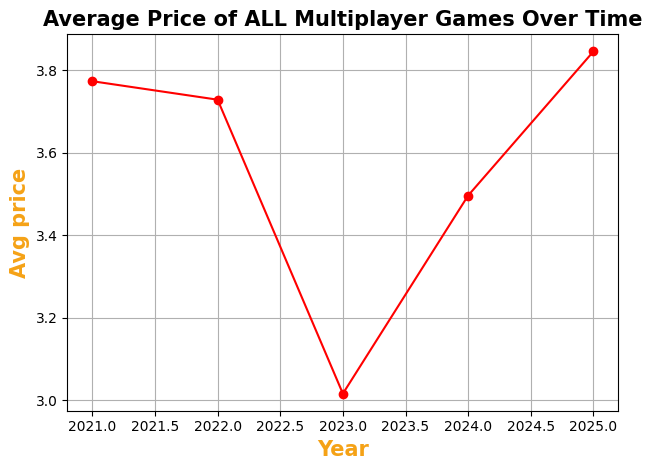

In [ ]:
plt.plot(df_multiplayer_price_avg.index, df_multiplayer_price_avg.values, color = "red", marker = "o")

plt.xlabel("Year", fontsize = 15, fontweight = "bold", color= "#F5A216")
plt.ylabel("Avg price", fontsize = 15, fontweight = "bold", color = "#F5A216")
plt.title("Average Price of ALL Multiplayer Games Over Time", fontsize = 15, fontweight = "bold" )
plt.tight_layout()
plt.grid(axis = "both")
plt.show()

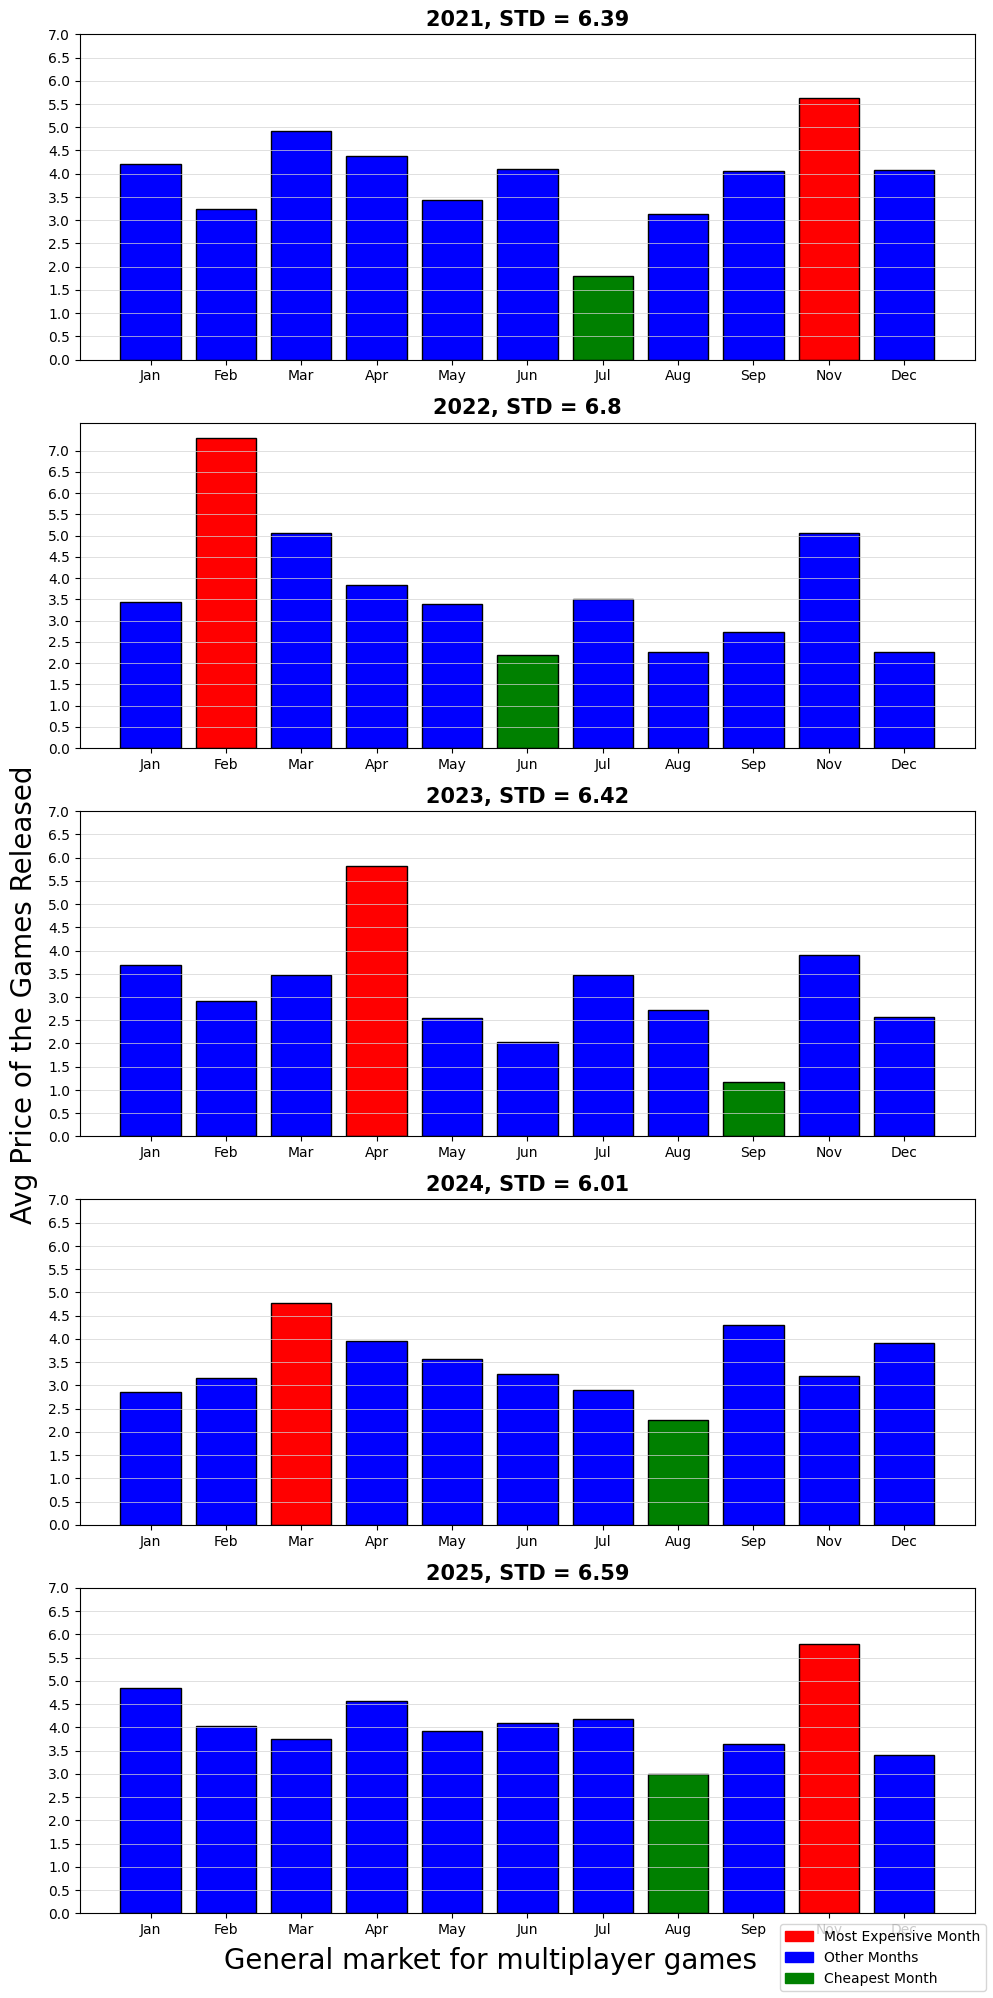

In [ ]:
figure, axes = plt.subplots(5, 1)
figure.set_size_inches(10, 20)

for i in np.arange(0,5, 1):
  max_month = groups[2020+(i+1)].idxmax()
  min_month = groups[2020+(i+1)].idxmin()


  colors = []  # list that will store the color of each bar for the axes!
  for month in groups[(2020+(i+1))].index:
      if month == max_month:
            colors.append('red')   # highlight the most expensive month
      elif month == min_month:
        colors.append('green')
      else:
            colors.append('blue')  # all other months in blue
  # makes the bar graph each axis
  axes[i].bar(groups[(2020+(i+1))].index, groups[2020+(i+1)].values, edgecolor = "black", color = colors)

#sets up the figure with correct ticks and titles
for i in range(5):
  axes[i].set_yticks(np.arange(0,7.5,0.5))
  axes[i].set_title(str(2020+(i+1)) + ", STD = " + str(mp_games_price_std[2020 +(i+1)]) , fontsize = 15, fontweight = "bold")
  axes[i].grid(axis = "y", linewidth = 0.5, color = "lightgrey")

red_patch = pltpatch.Patch(color='red', label='Most Expensive Month')
blue_patch = pltpatch.Patch(color = 'blue', label = 'Other Months')
green_patch = pltpatch.Patch(color = 'green', label = 'Cheapest Month')
figure.legend(handles = [red_patch, blue_patch, green_patch], loc = "lower right")
figure.supxlabel("General market for multiplayer games", fontsize = 20, color = "black")
figure.supylabel("Avg Price of the Games Released", fontsize = 20, color = "black")

plt.tight_layout()

plt.show()

#1. Reading the graphs:

*   Between 2021 and 2025, the lowest average game prices occurred in 2022–2024.

* Games released from June to September tend to be the cheapest, with August showing the lowest prices in the past two years. Future trends may follow a similar pattern, suggesting a potential correlation between release month and game price.

* The relatively high standard deviation relative to the mean is influenced by the presence of free-to-play titles, which increase price variability when combined with full-priced releases.

* Note that these conclusions are for multiplayer games only!

#2. Report to the graph/ readings above if you are tring to analyze:

* real consumer choices

* overall market behavior on how much on average a game would cost a real gamer



**as a real consumer would have choices to play the free games as much as they do with the paid games.**

In [ ]:
#let us only see the paid games in the market.

print("There were " + str(len(df_multiplayer[df_multiplayer["price"] != 0])) + " paid games in the steam market in between 2021 and 2025" )
print("There were " + str(len(df_multiplayer[df_multiplayer["price"] == 0])) + " free games in the steam market in between 2021 and 2025" )


There were 1225 paid games in the steam market in between 2021 and 2025
There were 1336 free games in the steam market in between 2021 and 2025


#This section focuses on the seasonal pricing patterns of publishers offering paid multi-player game releases.


In [ ]:
df_mp_p2p = df_multiplayer[df_multiplayer["price"] != 0]

In [ ]:
df_mp_p2p_agg_price = df_mp_p2p.groupby("release_year")["price"].mean()

# Likewise let us try and see the trends more in depth each month for each years for P2P(Pay To Play) Games.



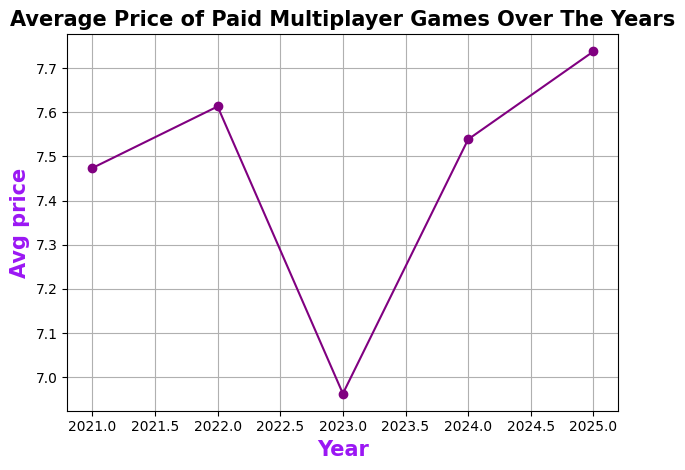

In [ ]:
plt.plot(df_mp_p2p_agg_price.index, df_mp_p2p_agg_price.values, color = "purple", marker = "o")
plt.title("Average Price of Paid Multiplayer Games Over The Years", fontsize = 15, fontweight = "bold" )
plt.xlabel("Year", fontsize = 15, fontweight = "bold", color = "#9B17F4")
plt.ylabel("Avg price", fontsize = 15, fontweight = "bold", color = "#9B17F4")
plt.tight_layout()
plt.grid(axis = "both")
plt.show()

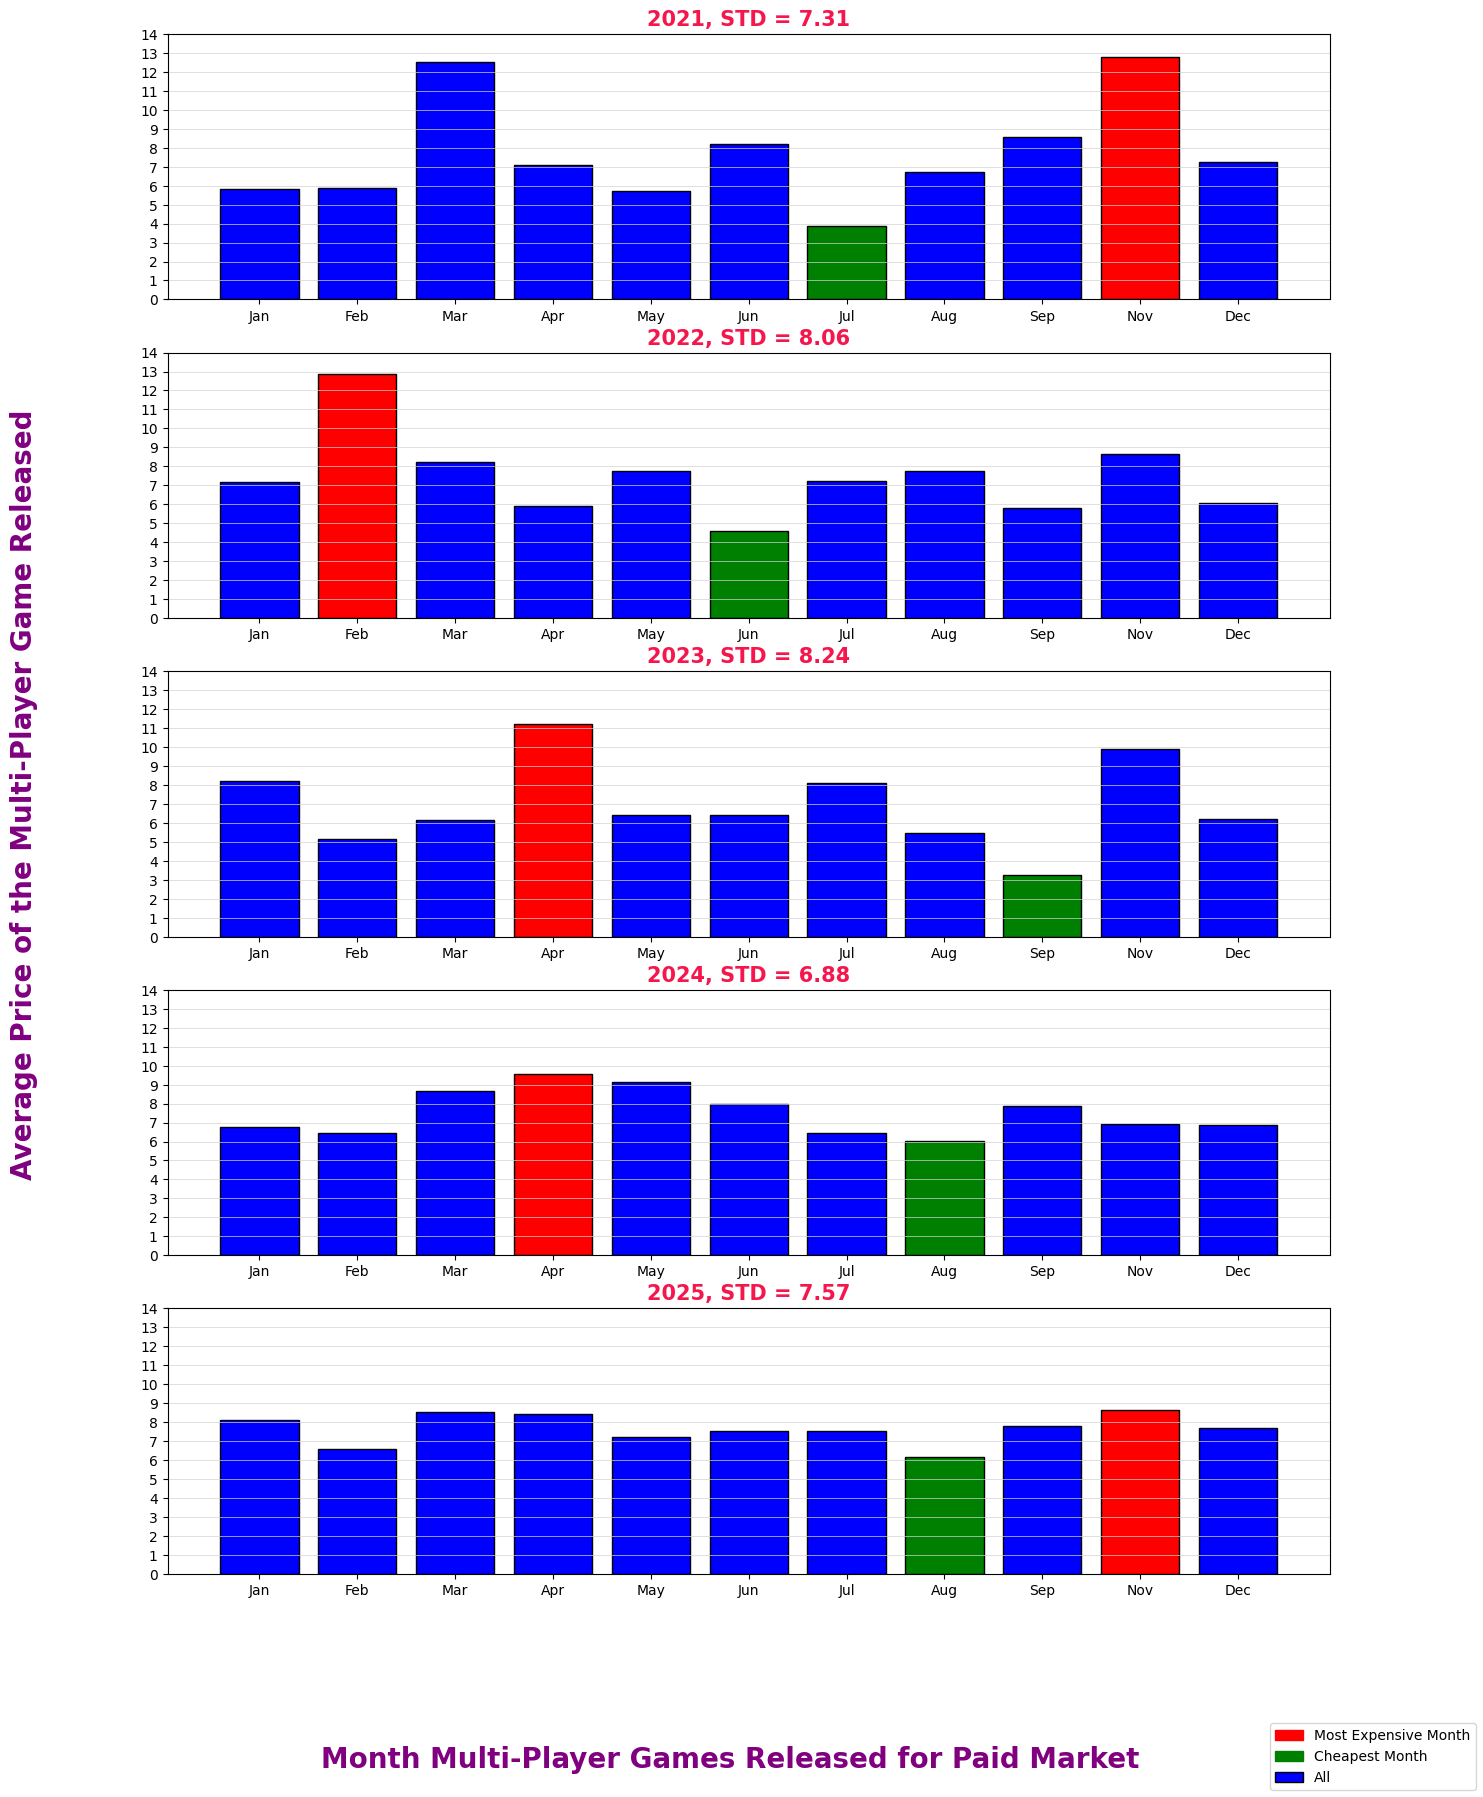

In [ ]:
figure, axes = plt.subplots(5,1)
#getting the data

group_p2p = {}
std_p2p = {}


for year in range(2021, 2026, 1):
  group_p2p[year] = df_mp_p2p[df_mp_p2p["release_year"] == year].groupby("release_month")["price"].mean().reindex(months_order)
  std_p2p[year] = round(df_mp_p2p[df_mp_p2p["release_year"] == year]["price"].std(), 2)





#customization
for i in range(0,5,1):
  max_month = group_p2p[2020+(i+1)].idxmax()
  min_month = group_p2p[2020+(i+1)].idxmin()
  p2p_bar_color = []

  for month in months_order:
    if month == max_month:
      p2p_bar_color.append("red")
    elif month == min_month:
      p2p_bar_color.append("green")
    else:
      p2p_bar_color.append("blue")


  axes[i].grid(axis ="y", linewidth = 0.5, color = "lightgray")

  #plotting the axes
  axes[i].bar(group_p2p[2020+(i+1)].index, group_p2p[2020+(i+1)].values, color = p2p_bar_color, edgecolor = "black")






# customization of the axes
figure.set_size_inches(15,20)
for i in range(0,5,1):
  axes[i].set_yticks(np.arange(0,15,1))
  axes[i].set_title(str(2020 + (i+1))+ ", STD = " + str(std_p2p[2020 +(i+1)]), fontsize = 15, fontweight = "bold", color = "#F5164C")

figure.legend(handles=[red_patch, green_patch, blue_patch], loc = "lower right")

figure.supxlabel("Month Multi-Player Games Released for Paid Market", fontsize = 20, fontweight = "bold", color = "purple")
figure.supylabel("Average Price of the Multi-Player Game Released",fontsize = 20, fontweight = "bold", color = "purple")
plt.tight_layout
plt.show()


In [ ]:
# Calculate fluctuation statistics for the general multiplayer market (df_multiplayer)
fluctuation_stats = {}

for year in range(2021, 2026):
    # Filter for the year
    df_year = df_multiplayer[df_multiplayer["release_year"] == year]

    # Calculate monthly averages
    monthly_avg = df_year.groupby("release_month")["price"].mean()

    max_avg = monthly_avg.max()
    min_avg = monthly_avg.min()
    spread = max_avg - min_avg
    overall_mean = df_year["price"].mean()
    std_dev = df_year["price"].std()

    fluctuation_stats[year] = {
        "Min Monthly Avg": round(min_avg, 2),
        "Max Monthly Avg": round(max_avg, 2),
        "Spread (Fluctuation)": round(spread, 2),
        "Overall Year Mean": round(overall_mean, 2),
        "Std Dev": round(std_dev, 2)
    }

# Display the stats dataframe
fluctuation_df = pd.DataFrame(fluctuation_stats).T
print("--- Gneneral Multiplayer Market Statistics ---")
fluctuation_df

--- Gneneral Multiplayer Market Statistics ---


,Min Monthly Avg,Max Monthly Avg,Spread (Fluctuation),Overall Year Mean,Std Dev
2021,1.80,5.64,3.84,3.77,6.39
2022,2.20,7.29,5.10,3.73,6.80
2023,1.18,5.81,4.63,3.02,6.42
2024,2.26,4.77,2.51,3.50,6.01
2025,0.00,5.80,5.80,3.85,6.59


In [ ]:
# Calculate fluctuation statistics for the PAID multiplayer market (df_mp_p2p)
fluctuation_stats_p2p = {}

for year in range(2021, 2026):
    # Filter for the year
    df_year = df_mp_p2p[df_mp_p2p["release_year"] == year]

    # Calculate monthly averages
    monthly_avg = df_year.groupby("release_month")["price"].mean()

    max_avg = monthly_avg.max()
    min_avg = monthly_avg.min()
    spread = max_avg - min_avg
    overall_mean = df_year["price"].mean()
    std_dev = df_year["price"].std()

    fluctuation_stats_p2p[year] = {
        "Min Monthly Avg": round(min_avg, 2),
        "Max Monthly Avg": round(max_avg, 2),
        "Spread (Fluctuation)": round(spread, 2),
        "Overall Year Mean": round(overall_mean, 2),
        "Std Dev": round(std_dev, 2)
    }

# Display the stats dataframe for Paid Games
fluctuation_df_p2p = pd.DataFrame(fluctuation_stats_p2p).T
print("--- Paid Multiplayer Market Statistics ---")
fluctuation_df_p2p

--- Paid Multiplayer Market Statistics ---


,Min Monthly Avg,Max Monthly Avg,Spread (Fluctuation),Overall Year Mean,Std Dev
2021,3.90,12.81,8.91,7.47,7.31
2022,4.57,12.87,8.31,7.61,8.06
2023,3.26,11.20,7.95,6.96,8.24
2024,6.03,9.55,3.52,7.54,6.88
2025,6.17,8.64,2.47,7.74,7.57


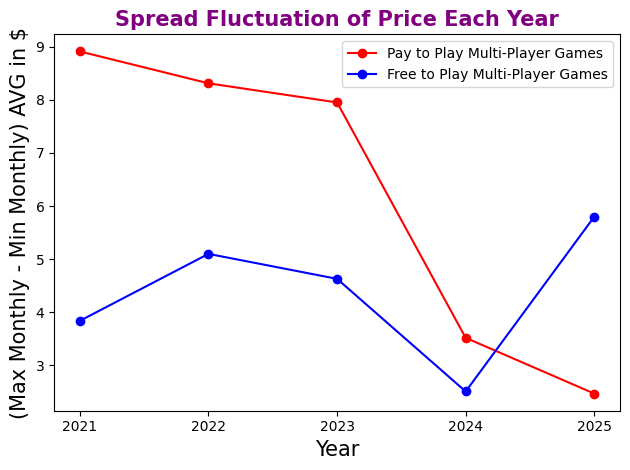

In [ ]:
plt.plot(fluctuation_df_p2p.index, fluctuation_df_p2p["Spread (Fluctuation)"],  color = "red", marker ="o", label = "Pay to Play Multi-Player Games")
plt.plot(fluctuation_df.index, fluctuation_df["Spread (Fluctuation)"], color = "blue", marker ="o", label = "Free to Play Multi-Player Games" )
plt.xticks(fluctuation_df_p2p.index)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("(Max Monthly - Min Monthly) AVG in $", fontsize = 15)
plt.title("Spread Fluctuation of Price Each Year", fontsize = 15, fontweight = "bold", color = "purple")
plt.tight_layout()
plt.legend()
plt.show()

# My Readings: Only For Multi-Player Games

## 1. Stability vs. Volatility

**Yearly Stability:**  
The average price of paid multiplayer games has remained fairly stable over the last five years, the mean cost hovering around \$7.50–\$7.75, with a slight dip in 2023. This suggests that the overall "cost of entry" for paid multiplayer games hasn’t increased significantly.

**Minimum Cost Of Entry to Steam Ecosystem:**

Obviously, the minimum cost for the genral multiplayer games is 0, but if you go to the pay 2 play market, ACD the minimum cost of entry is approximately $7.00.

**Monthly Volatility:**  
Despite stable yearly averages, the paid market is more volatile month-to-month than the general market. The difference between the cheapest and most expensive months ("Spread") for paid games ranged over \$8 from 2021 to2023. In contrast, the general market fluctuates by only \$3 to \$5. This indicates that the timing of major releases strongly impacts monthly averages. This can be seen in the Spread Fluctution Plot above.

---

## 2. The “Free” Buffer in the General Market

The general multiplayer market (including free-to-play games) appears smoother because the large number of \$0.00 titles acts as a stabilizing anchor. High-priced releases are diluted by the abundance of free games, resulting in lower standard deviation and smaller spreads.

---

## 3. Market Composition

- Paid games: ~1,225 titles  
- Free games: ~1,336 titles  

This near-equal split means that statistics like "average price" for the full market are heavily skewed by free games. In the paid segment, the high standard deviation (often equal to or greater than the mean) indicates a polarized market: affordable indie titles (\$5–\$15) versus full-priced AAA releases (\$60+).

---

## 4. Seasonal Trends

**I know this is what you are here to read**

- **Free game/Cheap games:** Lower price releases tend to occur in summer). duh, everyone knows you get summer sales on steam. Usually summer sale start mid june and ends late july.

#However, DRUM ROLL!! It actually turns out on avergae you get cheaper multiplayer releases on steam *AFTER* the summer sale ends i.e on August.

#Alright when to not buy new releases?
Paid games: Peaks in average price often occur in months like:
* February,
* April,
* November

Likely driven by major AAA releases. This is when you dont want to buy games. unless your rich, in that case, why are you even here? jk  

*Note: Correlation does not imply causation.*

---

## 5. Strategic Takeaways for Gamers to buy new Releases

1. **For general multiplayer games:** After Summer Sale is often the best time to find NEW cheap releases.  
2. **For paid games:** To be fair, Pricing is stable year-round. Timing purchases based on “average release month” could be less effective than waiting for sales (e.g., Winter or Summer Steam Sales). So don't come at me if you see the game you buy on sale few weeks later on winter/summer sale. :p
3. **Market Observation:**   However, High standard deviation confirms a polarized market—consumers/ or plarized publishers as they often choose to release between cheap indie titles and high-priced AAA releases. just like middle-class people in the real-world, the ones in between are ignored here too. so for AAA titles. maybe wait for the sales.

---

 **Conclusion:**  
- Paid multiplayer games in average have stable yearly release pricing but high monthly variability.

- Free games stabilize the general market’s averages.(steam probably uses that to make sure no users leave their eco-system. Something we've seen Epic Games try.  

- For paid quality titles, like the Upcoming AAA GTA 6, or if you see at the previous CyberPunk. Waiting for sales is more important than timing releases.


----------



## ANALYSING TREND FOR SINGLE PLAYER GAMES!


*Finding the mean price of  all single player games over the years*

{2021: np.float64(7.09), 2022: np.float64(7.76), 2023: np.float64(8.35), 2024: np.float64(8.23), 2025: np.float64(7.29)}


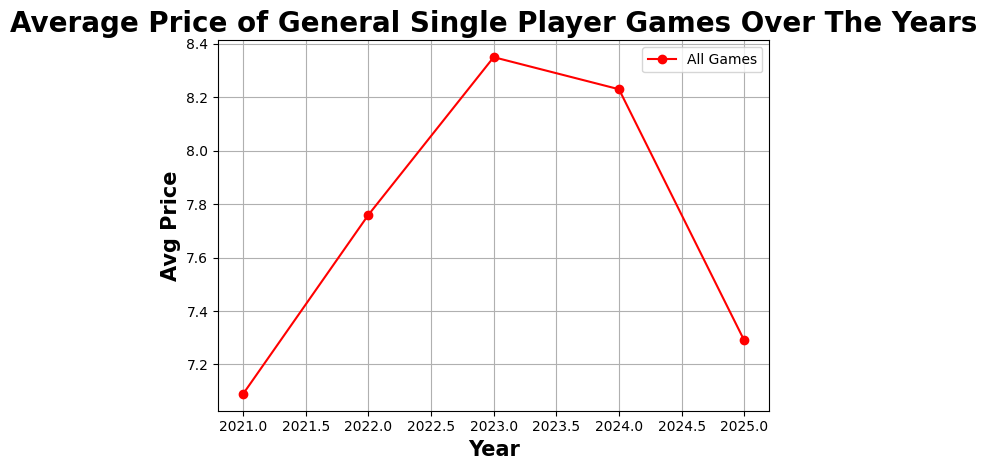

In [ ]:
mean_price_sp = {}

for i in range(2021, 2026):
    mean_price_sp[i] = round(
        df[
            (df["release_year"] == i) &
            (df["categories"].str.strip() == "Single-player")
        ]["price"].mean(),
        2
    )

print(mean_price_sp)
plt.plot(mean_price_sp.keys(), mean_price_sp.values(), color = "red", marker = "o", label = "All Games")
plt.xlabel("Year", fontsize = 15, fontweight = "bold")
plt.ylabel("Avg Price", fontsize = 15, fontweight = "bold")
plt.title("Average Price of General Single Player Games Over The Years", fontsize = 20, fontweight = "bold")
plt.tight_layout()
plt.legend()
plt.grid(axis = "both")
plt.show()

In [ ]:
df_sp = df[df["categories"].str.strip() == "Single-player"]

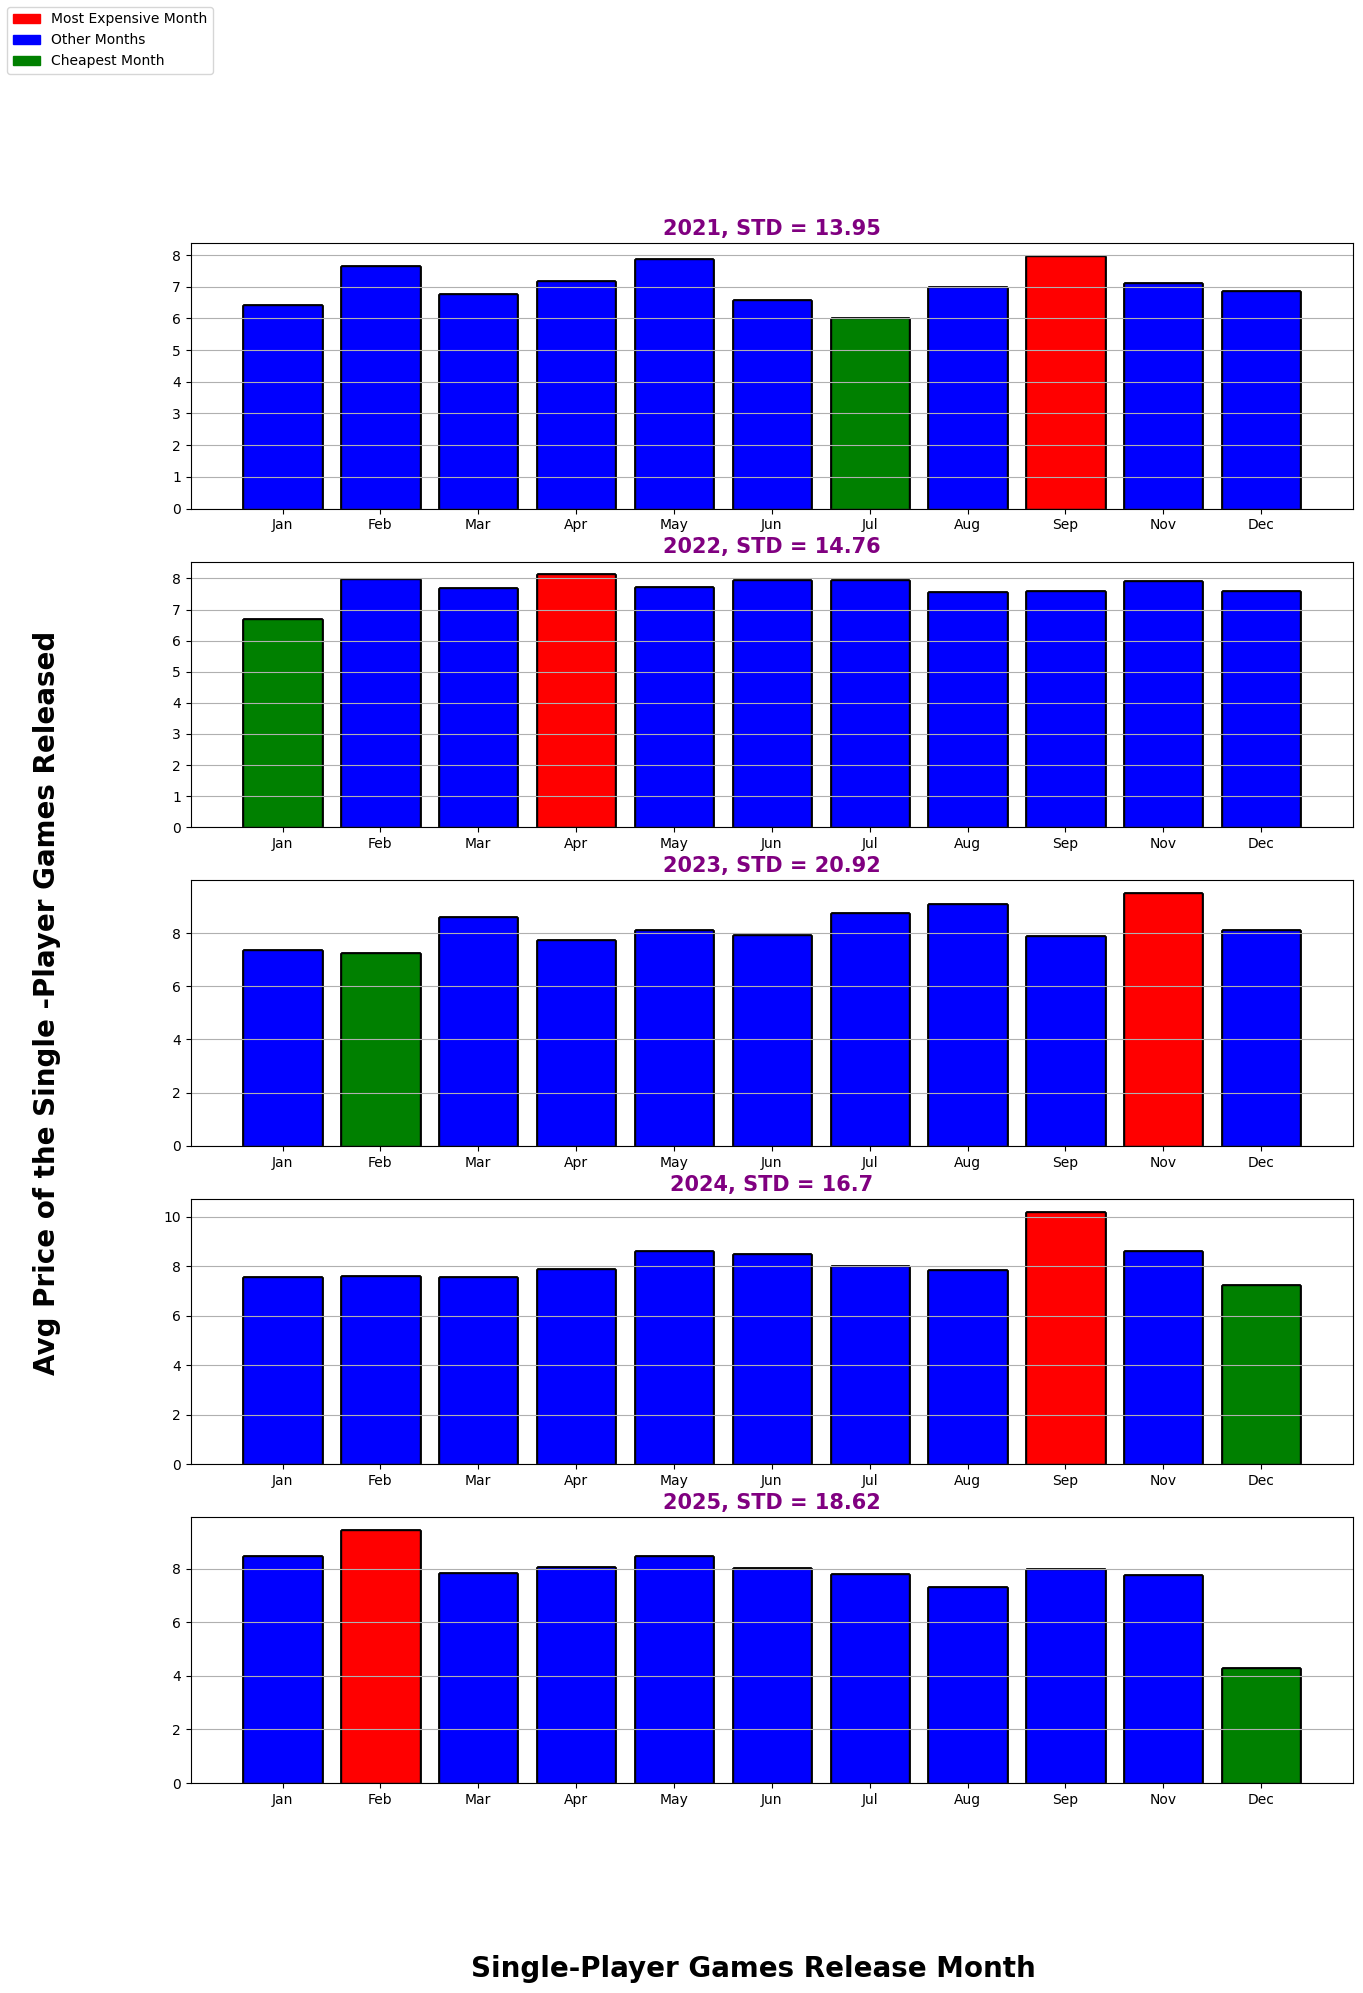

In [ ]:
figure, axes = plt.subplots(5, 1)
figure.set_size_inches(15, 20)


#I'll be using these later

max_month_sp_val = {}
min_month_sp_val = {}

figure.supxlabel("Gneral Single-Player Games Release Month", fontsize = 20, fontweight = "bold")
figure.supylabel("Avg Price of the Single -Player Games Released", fontsize = 20, fontweight = "bold")


group_sp = {}
std_sp = {}

figure.legend(handles = [red_patch, blue_patch, green_patch], loc = "upper left")


for year in range(2021, 2026, 1):
  group_sp[year] = df_sp[df_sp["release_year"] == year].groupby("release_month")["price"].mean().reindex(months_order)
  std_sp[year] = round(df_sp[df_sp["release_year"] == year]["price"].std(), 2)





for i in range(0,5,1):

  max_month = group_sp[2020+(i+1)].idxmax()
  max_month_sp_val[2020+(i+1)] = group_sp[2020+(i+1)][max_month]
  min_month = group_sp[2020+(i+1)].idxmin()
  min_month_sp_val[2020+(i+1)] = group_sp[2020+(i+1)][min_month]
  sp_bar_color = []

  for month in months_order:
    if month == max_month:
      sp_bar_color.append("red")
    elif month == min_month:
      sp_bar_color.append("green")
    else:
      sp_bar_color.append("blue")


    axes[i].grid(axis = "y")
    axes[i].set_title(str(2020 + (i+1))+ ", STD = " + str(std_sp[2020 + (i+1)]), fontweight = "bold", fontsize = "15", color = "purple")
    axes[i].bar(group_sp[2020+(i+1)].index, group_sp[2020+(i+1)].values,color  = sp_bar_color, edgecolor = "black")












In [ ]:
max_avg_series = pd.Series(max_month_sp_val, name='Max Monthly Average$')
min_avg_series = pd.Series(min_month_sp_val, name='Min Monthly Average$')
std_series = pd.Series(std_sp, name='Standard Deviation$')

sp_agg_df = pd.DataFrame({
    'Max Monthly Average$': max_avg_series,
    'Min Monthly Average$': min_avg_series,
    'Standard Deviation$': std_series
})

sp_agg_df['Spread'] = sp_agg_df['Max Monthly Average$'] - sp_agg_df['Min Monthly Average$']

In [ ]:
mean_price_sp_series = pd.Series(mean_price_sp, name='Overall Mean of the Year$')
sp_agg_df = pd.concat([sp_agg_df, mean_price_sp_series], axis=1)

print("------------------------- AGGREGATE VLAUES OF ALL SINGLE PLAYER GAMES ON STEAM----------------------------")
display(sp_agg_df)



------------------------- AGGREGATE VLAUES OF ALL SINGLE PLAYER GAMES ON STEAM----------------------------


,Max Monthly Average$,Min Monthly Average$,Standard Deviation$,Spread,Overall Mean of the Year$,Overall Mean of the Year$,Overall Mean of the Year$
2021,7.979104,6.005000,13.95,1.974104,7.09,7.09,7.09
2022,8.135633,6.697021,14.76,1.438613,7.76,7.76,7.76
2023,9.517333,7.256314,20.92,2.261019,8.35,8.35,8.35
2024,10.213916,7.242667,16.70,2.971249,8.23,8.23,8.23
2025,9.438479,4.303467,18.62,5.135012,7.29,7.29,7.29


##Quick Analysis on Trend of Paid Single Player Games On Steam

----

In [ ]:
df_sp_p2p  = df_sp[df_sp["price"] !=0]

In [ ]:
df_sp_p2p_agg_price = df_sp_p2p.groupby("release_year")["price"].agg(["min", "max", "mean", "std"])

df_sp_p2p_agg_price

,min,max,mean,std
release_year,,,,
2021,0.49,199.99,7.854039,14.482076
2022,0.49,199.99,8.653069,15.336697
2023,0.49,999.98,9.264187,21.844764
2024,0.49,500.00,9.210797,17.406419
2025,0.49,1900.00,8.825066,20.147502


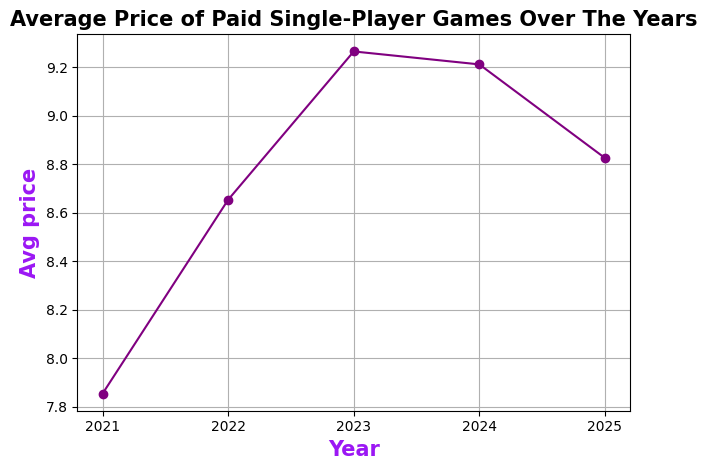

In [ ]:
plt.plot (df_sp_p2p_agg_price.index, df_sp_p2p_agg_price["mean"], color = "purple", marker = "o")
plt.grid(axis = "both")
plt.title("Average Price of Paid Single-Player Games Over The Years", fontsize = 15, fontweight = "bold")
plt.xlabel("Year", fontsize = 15, fontweight = "bold", color = "#9B17F4")
plt.ylabel("Avg price", fontsize = 15, fontweight = "bold", color = "#9B17F4")
plt.xticks(df_sp_p2p_agg_price.index)
plt.tight_layout()
plt.show()

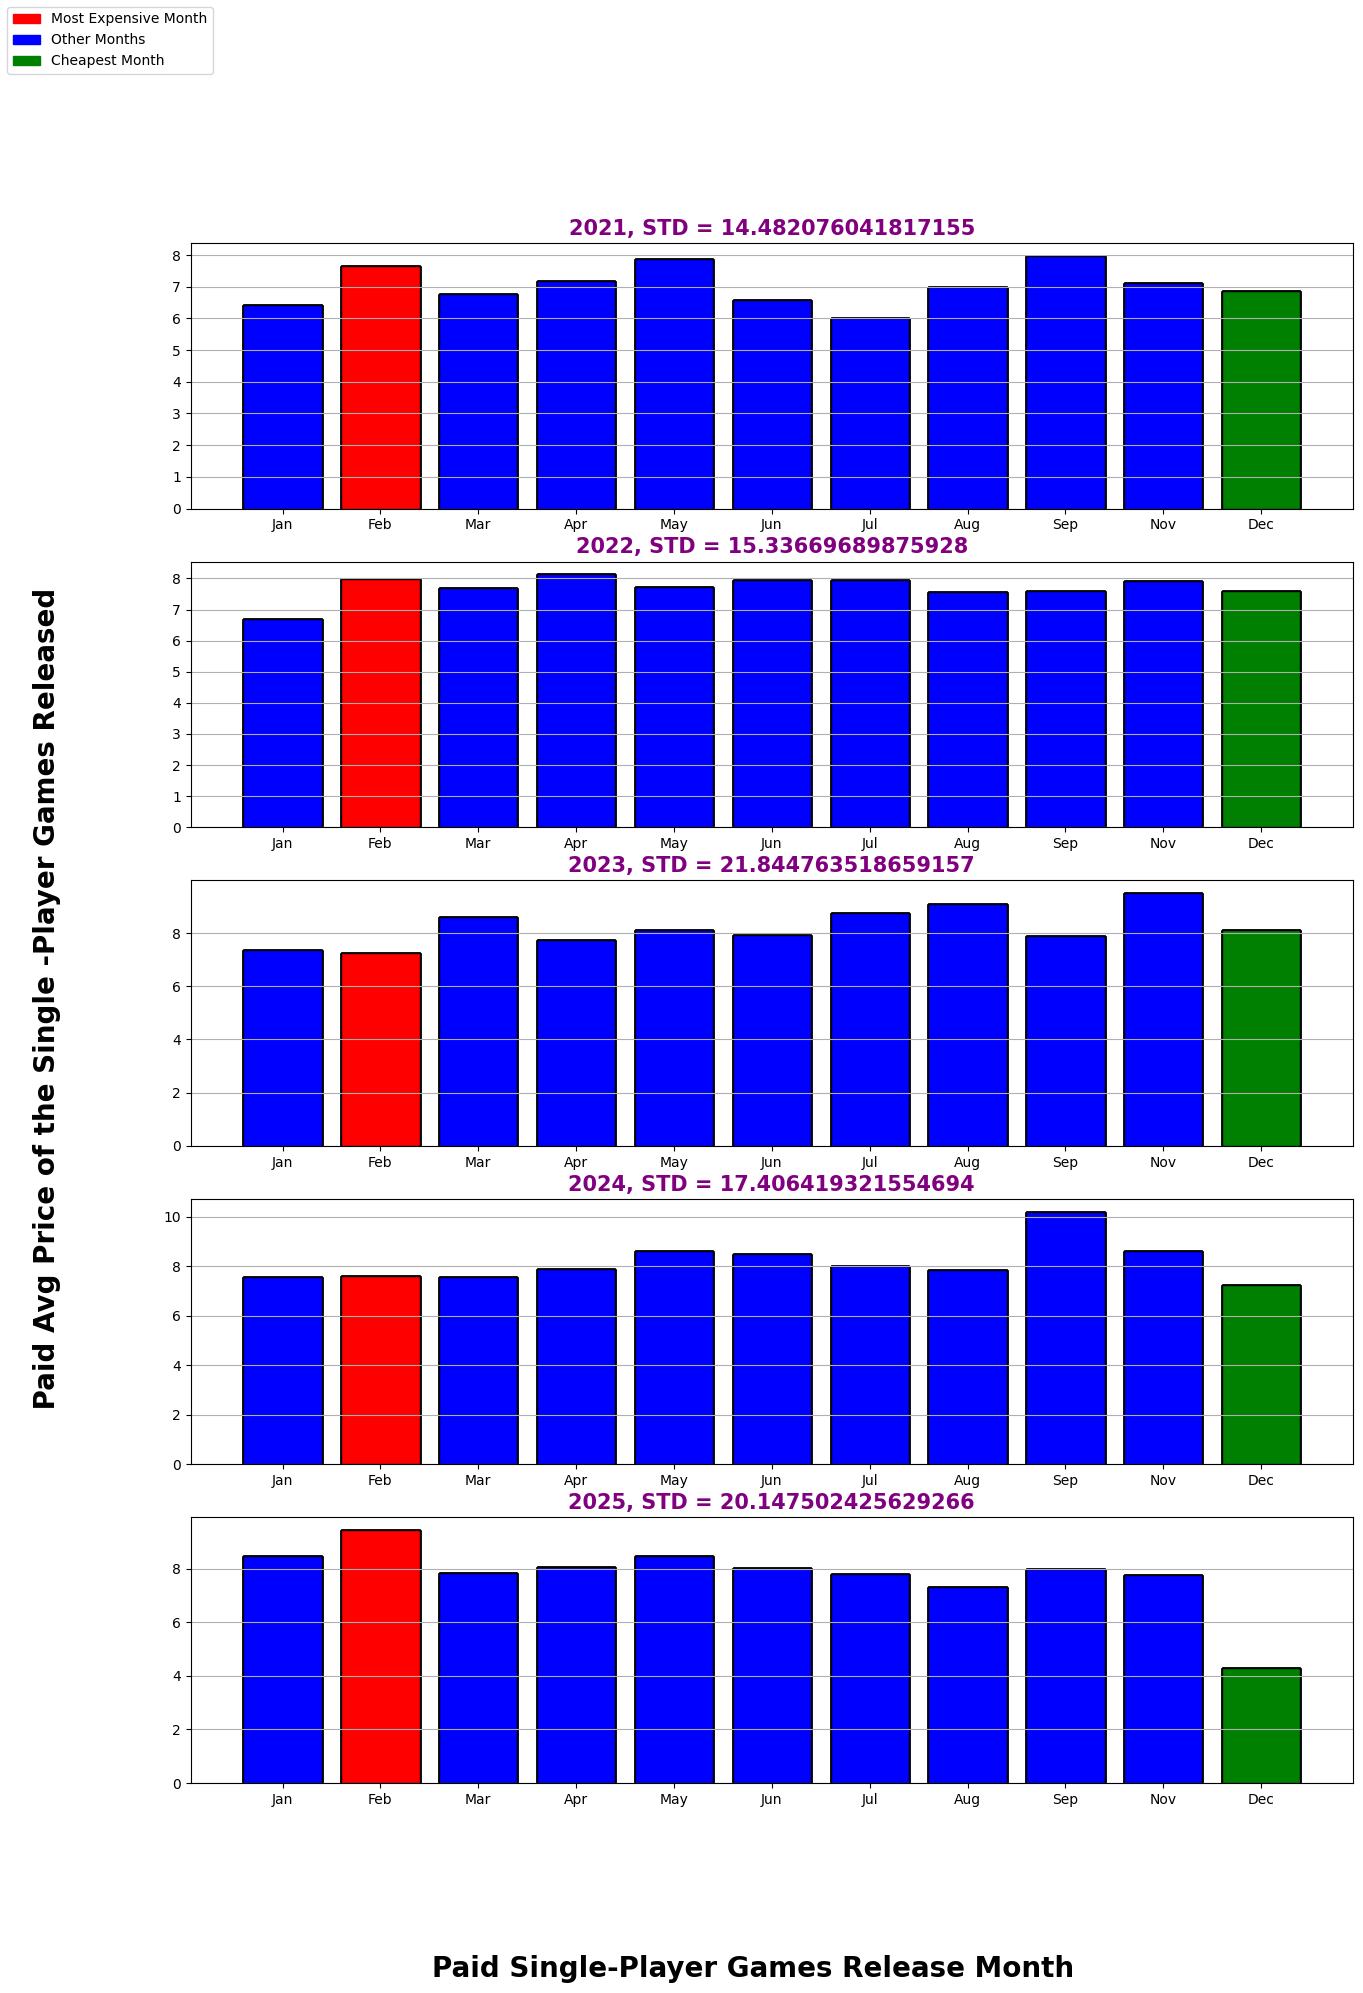

In [ ]:
figure, axes = plt.subplots(5, 1)
figure.set_size_inches(15, 20)


#I'll be using these later

max_month_sp_p2p_val = {}
min_month_sp_p2p_val = {}

figure.supxlabel("Paid Single-Player Games Release Month", fontsize = 20, fontweight = "bold")
figure.supylabel(" Paid Avg Price of the Single -Player Games Released", fontsize = 20, fontweight = "bold")


group_p2p_sp = {}
figure.legend(handles = [red_patch, blue_patch, green_patch], loc = "upper left")


for year in range(2021, 2026, 1):
  group_p2p_sp[year] = df_sp_p2p[df_sp_p2p["release_year"] == year].groupby("release_month")["price"].mean().reindex(months_order)





for i in range(0,5,1):

  max_month = group_sp[2020+(i+1)].idxmax()
  max_month_sp_p2p_val[2020+(i+1)] = group_sp[2020+(i+1)][max_month]
  min_month = group_sp[2020+(i+1)].idxmin()
  min_month_sp_p2p_val[2020+(i+1)] = group_sp[2020+(i+1)][min_month]
  sp_p2p_bar_color = []

  for month in months_order:
    if month == max_month:
      sp_p2p_bar_color.append("red")
    elif month == min_month:
      sp_p2p_bar_color.append("green")
    else:
      sp_p2p_bar_color.append("blue")


    axes[i].grid(axis = "y")
    axes[i].set_title(str(2020 + (i+1))+ ", STD = " + str(df_sp_p2p_agg_price["std"][i+(2021)]), fontweight = "bold", fontsize = "15", color = "purple")
    axes[i].bar(group_sp[2020+(i+1)].index, group_sp[2020+(i+1)].values,color  = sp_bar_color, edgecolor = "black")












#Comparing Paid. vs General Market Pricing Trend For ***Single Player Games***

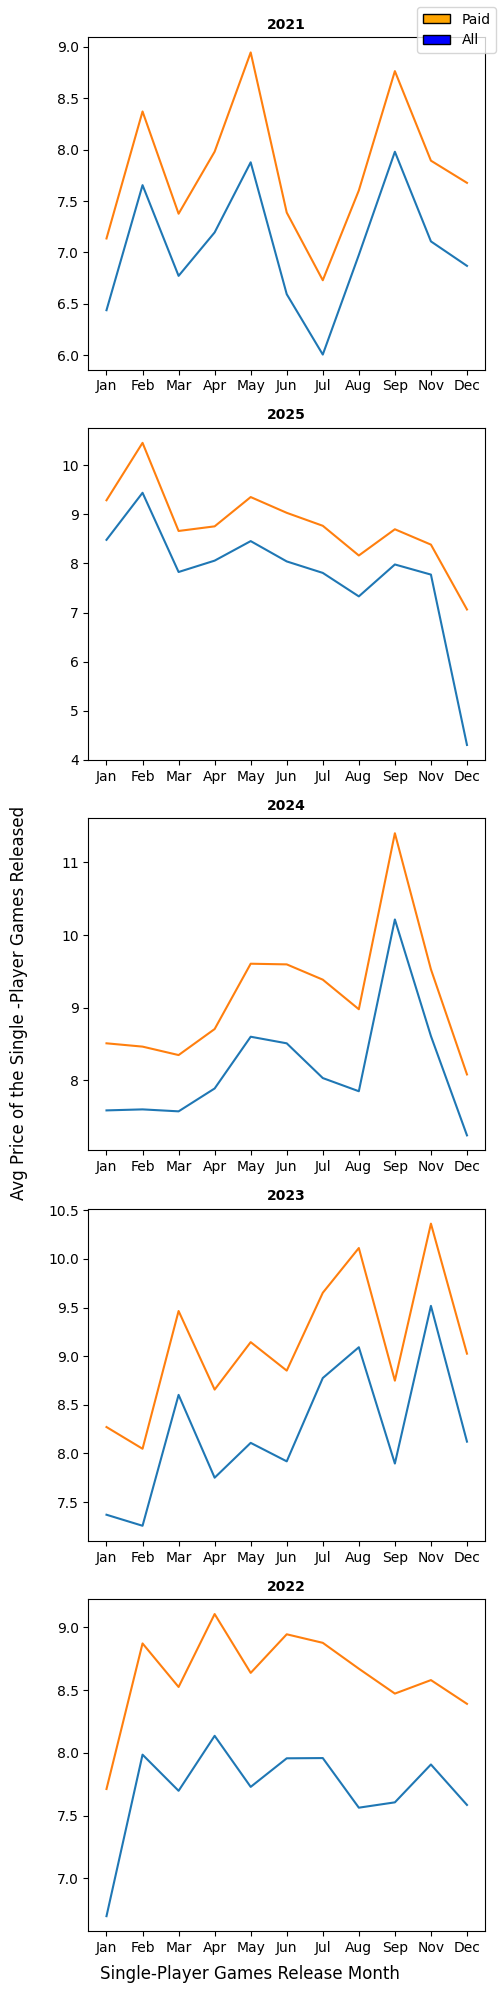

In [ ]:
figure, axes = plt.subplots(5,1)
figure.set_size_inches(5,20)
figure.supxlabel("Single-Player Games Release Month")
figure.supylabel("Avg Price of the Single -Player Games Released")

orange_patch = pltpatch.Patch(facecolor='orange', edgecolor='black', label='Paid')
blue_patch = pltpatch.Patch(facecolor='blue', edgecolor='black', label='All')
figure.legend(handles = [orange_patch, blue_patch])
for year in range(2021, 2026, 1):
  axes[2021 - year].plot(group_sp[year].index, group_sp[year].values)
  axes[2021 - year].plot(group_p2p_sp[year].index, group_p2p_sp[year].values)
  axes[2021 - year].set_title(str(year), fontsize = 10, fontweight = "bold")


figure.tight_layout()



# What we can conclude from this visual:
* Impact of Free Games: You will likely observe that the blue
line (General all single player games) typically runs below or very close to the orange line (Paid). This is because the inclusion of free-to-play games in the 'General' category pulls down the overall average price, echoing the buffer effect we saw in the multiplayer market.

* Monthly Volatility: Both lines will show fluctuations month-to-month, but the orange line (Paid) might exhibit more pronounced peaks and valleys. This indicates that the paid single-player market can be more sensitive to specific release dates of higher-priced titles within a month.

* Seasonal Patterns: By looking across the years, we can identify any recurring monthly patterns. For example, if certain months consistently show dips in the orange line, it could suggest periods when paid single-player games tend to be released at lower average prices, or vice versa for peaks.

* Market Dynamics: The visual helps us understand the price behavior of single-player games relative to whether free games are included. It reinforces the idea that even for single-player experiences, the presence of free options can significantly skew overall market averages.

**Why the Comparison is  Useful:**
The purpose of comparing these two lines is to highlight the impact of free games on the overall market average.

* When the blue line is noticeably lower than the orange line, it signifies that there were a significant number of free single-player games released that month,that can be seen in 2022, wher the blue line significantly pulls lower than the ornage line around before/after Jun/July pulling down the overall average. This could be because puvlushers do not want to release their games before summer sale. people will tend not buy expensive games, as they know a sale is around the corner.

* If the blue line is very close to the orange line, it suggests that fewer free single-player games were released, or their volume wasn't enough to significantly dilute the average price of the paid games. This increases the price of entry into the steam ecosystem. ***There can be seen a trend where this is especially high around November and goes goes down around Dec-Jan***.


* Hence the cost of entry if you are also looking for **new** **single player** games(inclusive of paid games), **DEC-JAN** will have the lowest cost of entry among any other months ACD(according to the data).

##Single-Player vs Multiplayer Pricing Models

The observed pricing trends align closely with established game industry economics and monetization strategies.

**Multiplayer games seem to tend to adopt a long-term engagement model. Lower upfront prices reduce the barrier to entry, helping developers build and sustain a large player base. Revenue is often generated over time through downloadable content (DLCs), cosmetic items, season passes, or in-game purchases rather than the initial sale price. This explains the relatively stable and lower average prices observed in the multiplayer market.**

**Single-player games, in contrast, follow an upfront value proposition. These games are typically sold as complete, self-contained experiences, where most of the development cost is recovered at the point of purchase. As a result, single-player titles often command higher initial prices and exhibit greater price variation depending on production scale, genre, and perceived content depth.**